In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '/data/programs/probe_position_correction_w_ptychonn/pppc')
sys.path.insert(0, '/data/programs/probe_position_correction_w_ptychonn')
import numpy as np
import torch
import matplotlib.pyplot as plt

import pppc
from pppc.configs import PtychoNNTrainingConfigDict
from pppc.ptychonn.trainer import PtychoNNTrainer, PtychoNNHyperparameterScanner
from pppc.ptychonn.dataset_handle import HDF5Dataset
from pppc.ptychonn.model import PtychoNNModel, PtychoNNPhaseOnlyModel

[2023-11-22 17:03:33,341] Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[2023-11-22 17:03:33,342] NumExpr defaulting to 8 threads.


Create a baseline config dict. 

In [3]:
base_config_dict = PtychoNNTrainingConfigDict()
base_config_dict['batch_size_per_process'] = 64
base_config_dict['num_epochs'] = 60
base_config_dict['learning_rate_per_process'] = 1e-3
base_config_dict['optimizer'] = 'adam'
base_config_dict['model_save_dir'] = '../../trained_models/model_36SpiralDatasets'
base_config_dict['validation_ratio'] = 0.01
dataset = HDF5Dataset('data/data_train.h5', verbose=False)
base_config_dict['dataset'] = dataset
base_config_dict['model'] = None
base_config_dict['debug'] = False

In [4]:
param_scan_dict = {
    'model': [(PtychoNNPhaseOnlyModel, {}), (PtychoNNModel, {'n_levels': 3}), (PtychoNNModel, {'n_levels': 4}), ],
    'batch_size_per_process': [64, 32],
    'learning_rate_per_process': [1e-3, 1e-4]
}

In [5]:
scanner = PtychoNNHyperparameterScanner(param_scan_dict, base_config_dict)
scanner.build()

In [6]:
scanner.result_table

model  batch_size_per_process  \
0    PtychoNNPhaseOnlyModel                      64   
1    PtychoNNPhaseOnlyModel                      64   
2    PtychoNNPhaseOnlyModel                      32   
3    PtychoNNPhaseOnlyModel                      32   
4   PtychoNNModel_nLevels_3                      64   
5   PtychoNNModel_nLevels_3                      64   
6   PtychoNNModel_nLevels_3                      32   
7   PtychoNNModel_nLevels_3                      32   
8   PtychoNNModel_nLevels_4                      64   
9   PtychoNNModel_nLevels_4                      64   
10  PtychoNNModel_nLevels_4                      32   
11  PtychoNNModel_nLevels_4                      32   

    learning_rate_per_process  min_val_loss_total  min_val_loss_mag  \
0                      0.0010                 0.0               0.0   
1                      0.0001                 0.0               0.0   
2                      0.0010                 0.0               0.0   
3                      0.0001                 0.0               0.0   
4                      0.0010                 0.0               0.0   
5                      0.0001                 0.0               0.0   
6                      0.0010                 0.0               0.0   
7                      0.0001                 0.0               0.0   
8                      0.0010                 0.0               0.0   
9                      0.0001                 0.0               0.0   
10                     0.0010                 0.0               0.0   
11                     0.0001                 0.0               0.0   

    min_val_loss_phase  epoch_min_val_loss  
0                  0.0                 0.0  
1                  0.0                 0.0  
2                  0.0                 0.0  
3                  0.0                 0.0  
4                  0.0                 0.0  
5                  0.0                 0.0  
6                  0.0                 0.0  
7                  0.0                 0.0  
8                  0.0                 0.0  
9                  0.0                 0.0  
10                 0.0                 0.0  
11                 0.0                 0.0

In [7]:
scanner.run()
scanner.result_table

  0%|                                                                                                                                                                                                                                                    | 0/12 [00:00<?, ?it/s][2023-11-22 17:03:34,309] Using DataParallel with 2 devices.
[2023-11-22 17:07:47,275] Saving improved model after Val Loss improved from inf to 0.56405
[2023-11-22 17:11:46,188] Saving improved model after Val Loss improved from 0.56405 to 0.52012
  8%|███████████████████                                                                                                                                                                                                                 | 1/12 [4:00:18<44:03:23, 14418.47s/it][2023-11-22 21:03:52,700] Using DataParallel with 2 devices.


Device 0 memory info:
    8080.375 MB total
    1464.0 MB reserved
    11.21533203125 MB allocated


[2023-11-22 21:07:51,125] Saving improved model after Val Loss improved from inf to 0.58048
[2023-11-22 21:11:50,454] Saving improved model after Val Loss improved from 0.58048 to 0.57518
[2023-11-22 21:15:50,534] Saving improved model after Val Loss improved from 0.57518 to 0.47629
[2023-11-22 21:19:51,873] Saving improved model after Val Loss improved from 0.47629 to 0.36072
[2023-11-22 21:23:53,949] Saving improved model after Val Loss improved from 0.36072 to 0.30687
[2023-11-22 21:27:56,747] Saving improved model after Val Loss improved from 0.30687 to 0.27488
[2023-11-22 21:31:58,717] Saving improved model after Val Loss improved from 0.27488 to 0.26437
[2023-11-22 21:36:00,228] Saving improved model after Val Loss improved from 0.26437 to 0.24697
[2023-11-22 21:40:05,639] Saving improved model after Val Loss improved from 0.24697 to 0.24001
[2023-11-22 21:44:06,205] Saving improved model after Val Loss improved from 0.24001 to 0.23412
[2023-11-22 21:48:06,270] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    1480.0 MB reserved
    22.4306640625 MB allocated


[2023-11-23 01:08:15,217] Saving improved model after Val Loss improved from inf to 0.55680
[2023-11-23 01:12:45,081] Saving improved model after Val Loss improved from 0.55680 to 0.35182
[2023-11-23 01:17:06,170] Saving improved model after Val Loss improved from 0.35182 to 0.27276
[2023-11-23 01:21:24,067] Saving improved model after Val Loss improved from 0.27276 to 0.23537
[2023-11-23 01:30:01,230] Saving improved model after Val Loss improved from 0.23537 to 0.23218
[2023-11-23 01:34:23,134] Saving improved model after Val Loss improved from 0.23218 to 0.22312
[2023-11-23 01:38:41,144] Saving improved model after Val Loss improved from 0.22312 to 0.19575
[2023-11-23 01:43:12,561] Saving improved model after Val Loss improved from 0.19575 to 0.18851
[2023-11-23 01:47:36,853] Saving improved model after Val Loss improved from 0.18851 to 0.18458
[2023-11-23 01:51:59,204] Saving improved model after Val Loss improved from 0.18458 to 0.17331
[2023-11-23 01:56:22,290] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    786.0 MB reserved
    33.64599609375 MB allocated


[2023-11-23 05:30:38,579] Saving improved model after Val Loss improved from inf to 0.57434
[2023-11-23 05:35:08,125] Saving improved model after Val Loss improved from 0.57434 to 0.52782
[2023-11-23 05:39:26,411] Saving improved model after Val Loss improved from 0.52782 to 0.36763
[2023-11-23 05:43:42,081] Saving improved model after Val Loss improved from 0.36763 to 0.32134
[2023-11-23 05:48:06,469] Saving improved model after Val Loss improved from 0.32134 to 0.29025
[2023-11-23 05:52:23,519] Saving improved model after Val Loss improved from 0.29025 to 0.26604
[2023-11-23 05:56:40,287] Saving improved model after Val Loss improved from 0.26604 to 0.24114
[2023-11-23 06:01:07,035] Saving improved model after Val Loss improved from 0.24114 to 0.23238
[2023-11-23 06:09:55,889] Saving improved model after Val Loss improved from 0.23238 to 0.22466
[2023-11-23 06:14:24,282] Saving improved model after Val Loss improved from 0.22466 to 0.21886
[2023-11-23 06:18:53,931] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    794.0 MB reserved
    44.861328125 MB allocated


[2023-11-23 09:55:30,764] Saving improved model after Val Loss improved from inf to 0.63478
[2023-11-23 09:59:43,687] Saving improved model after Val Loss improved from 0.63478 to 0.48414
[2023-11-23 10:04:03,955] Saving improved model after Val Loss improved from 0.48414 to 0.45484
[2023-11-23 10:08:17,941] Saving improved model after Val Loss improved from 0.45484 to 0.42764
[2023-11-23 10:16:50,180] Saving improved model after Val Loss improved from 0.42764 to 0.41019
[2023-11-23 10:21:10,769] Saving improved model after Val Loss improved from 0.41019 to 0.40366
[2023-11-23 10:25:29,096] Saving improved model after Val Loss improved from 0.40366 to 0.39697
[2023-11-23 10:29:47,054] Saving improved model after Val Loss improved from 0.39697 to 0.39106
[2023-11-23 10:34:04,693] Saving improved model after Val Loss improved from 0.39106 to 0.38492
[2023-11-23 10:38:26,004] Saving improved model after Val Loss improved from 0.38492 to 0.38080
[2023-11-23 10:42:43,269] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    4544.0 MB reserved
    63.9052734375 MB allocated


[2023-11-23 14:18:42,803] Saving improved model after Val Loss improved from inf to 0.61288
[2023-11-23 14:23:02,532] Saving improved model after Val Loss improved from 0.61288 to 0.55511
[2023-11-23 14:27:22,143] Saving improved model after Val Loss improved from 0.55511 to 0.49086
[2023-11-23 14:31:41,987] Saving improved model after Val Loss improved from 0.49086 to 0.45249
[2023-11-23 14:36:02,190] Saving improved model after Val Loss improved from 0.45249 to 0.43267
[2023-11-23 14:40:25,813] Saving improved model after Val Loss improved from 0.43267 to 0.41888
[2023-11-23 14:44:48,614] Saving improved model after Val Loss improved from 0.41888 to 0.40005
[2023-11-23 14:49:09,619] Saving improved model after Val Loss improved from 0.40005 to 0.39446
[2023-11-23 14:53:28,681] Saving improved model after Val Loss improved from 0.39446 to 0.38580
[2023-11-23 14:57:48,560] Saving improved model after Val Loss improved from 0.38580 to 0.38049
[2023-11-23 15:02:11,170] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    4578.0 MB reserved
    82.94921875 MB allocated


[2023-11-23 18:39:06,276] Saving improved model after Val Loss improved from inf to 0.43195
[2023-11-23 18:43:45,311] Saving improved model after Val Loss improved from 0.43195 to 0.38310
[2023-11-23 18:48:24,364] Saving improved model after Val Loss improved from 0.38310 to 0.37298
[2023-11-23 18:53:06,710] Saving improved model after Val Loss improved from 0.37298 to 0.36369
[2023-11-23 18:57:49,144] Saving improved model after Val Loss improved from 0.36369 to 0.34859
[2023-11-23 19:02:28,617] Saving improved model after Val Loss improved from 0.34859 to 0.34701
[2023-11-23 19:07:13,495] Saving improved model after Val Loss improved from 0.34701 to 0.33158
[2023-11-23 19:11:53,479] Saving improved model after Val Loss improved from 0.33158 to 0.32830
[2023-11-23 19:16:34,834] Saving improved model after Val Loss improved from 0.32830 to 0.32178
[2023-11-23 19:21:15,990] Saving improved model after Val Loss improved from 0.32178 to 0.31718
[2023-11-23 19:25:54,956] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    2204.0 MB reserved
    101.9931640625 MB allocated


[2023-11-23 23:18:23,961] Saving improved model after Val Loss improved from inf to 0.61097
[2023-11-23 23:23:08,396] Saving improved model after Val Loss improved from 0.61097 to 0.48448
[2023-11-23 23:27:47,661] Saving improved model after Val Loss improved from 0.48448 to 0.45394
[2023-11-23 23:32:26,657] Saving improved model after Val Loss improved from 0.45394 to 0.43777
[2023-11-23 23:37:04,495] Saving improved model after Val Loss improved from 0.43777 to 0.41927
[2023-11-23 23:41:42,599] Saving improved model after Val Loss improved from 0.41927 to 0.40141
[2023-11-23 23:46:23,782] Saving improved model after Val Loss improved from 0.40141 to 0.39170
[2023-11-23 23:51:03,172] Saving improved model after Val Loss improved from 0.39170 to 0.38448
[2023-11-23 23:55:43,959] Saving improved model after Val Loss improved from 0.38448 to 0.37450
[2023-11-24 00:00:22,774] Saving improved model after Val Loss improved from 0.37450 to 0.36428
[2023-11-24 00:05:00,874] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    2222.0 MB reserved
    121.037109375 MB allocated


[2023-11-24 03:58:13,099] Saving improved model after Val Loss improved from inf to 0.64457
[2023-11-24 04:02:41,809] Saving improved model after Val Loss improved from 0.64457 to 0.42648
[2023-11-24 04:07:10,730] Saving improved model after Val Loss improved from 0.42648 to 0.32783
[2023-11-24 04:11:39,095] Saving improved model after Val Loss improved from 0.32783 to 0.29403
[2023-11-24 04:16:07,987] Saving improved model after Val Loss improved from 0.29403 to 0.28585
[2023-11-24 04:20:36,692] Saving improved model after Val Loss improved from 0.28585 to 0.27570
[2023-11-24 04:25:04,757] Saving improved model after Val Loss improved from 0.27570 to 0.26640
[2023-11-24 04:29:33,413] Saving improved model after Val Loss improved from 0.26640 to 0.25721
[2023-11-24 04:34:02,212] Saving improved model after Val Loss improved from 0.25721 to 0.24959
[2023-11-24 04:38:31,149] Saving improved model after Val Loss improved from 0.24959 to 0.24324
[2023-11-24 04:43:03,354] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    4860.0 MB reserved
    199.3154296875 MB allocated


[2023-11-24 08:26:53,847] Saving improved model after Val Loss improved from inf to 0.64563
[2023-11-24 08:31:24,270] Saving improved model after Val Loss improved from 0.64563 to 0.45528
[2023-11-24 08:35:55,041] Saving improved model after Val Loss improved from 0.45528 to 0.34814
[2023-11-24 08:40:25,068] Saving improved model after Val Loss improved from 0.34814 to 0.30169
[2023-11-24 08:44:55,156] Saving improved model after Val Loss improved from 0.30169 to 0.27989
[2023-11-24 08:49:25,779] Saving improved model after Val Loss improved from 0.27989 to 0.25328
[2023-11-24 08:53:55,676] Saving improved model after Val Loss improved from 0.25328 to 0.23996
[2023-11-24 09:02:57,434] Saving improved model after Val Loss improved from 0.23996 to 0.22442
[2023-11-24 09:07:27,264] Saving improved model after Val Loss improved from 0.22442 to 0.21869
[2023-11-24 09:11:56,759] Saving improved model after Val Loss improved from 0.21869 to 0.21340
[2023-11-24 09:16:27,153] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    4906.0 MB reserved
    273.52294921875 MB allocated


[2023-11-24 12:58:20,876] Saving improved model after Val Loss improved from inf to 0.60278
[2023-11-24 13:03:16,293] Saving improved model after Val Loss improved from 0.60278 to 0.35850
[2023-11-24 13:08:16,627] Saving improved model after Val Loss improved from 0.35850 to 0.31438
[2023-11-24 13:13:12,981] Saving improved model after Val Loss improved from 0.31438 to 0.29996
[2023-11-24 13:18:06,034] Saving improved model after Val Loss improved from 0.29996 to 0.29278
[2023-11-24 13:23:02,716] Saving improved model after Val Loss improved from 0.29278 to 0.28282
[2023-11-24 13:27:58,822] Saving improved model after Val Loss improved from 0.28282 to 0.27956
[2023-11-24 13:32:53,042] Saving improved model after Val Loss improved from 0.27956 to 0.26122
[2023-11-24 13:37:48,586] Saving improved model after Val Loss improved from 0.26122 to 0.25009
[2023-11-24 13:42:43,231] Saving improved model after Val Loss improved from 0.25009 to 0.24603
[2023-11-24 13:47:37,485] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    2514.0 MB reserved
    347.744140625 MB allocated


[2023-11-24 17:57:38,313] Saving improved model after Val Loss improved from inf to 0.57717
[2023-11-24 18:02:32,780] Saving improved model after Val Loss improved from 0.57717 to 0.36025
[2023-11-24 18:07:30,383] Saving improved model after Val Loss improved from 0.36025 to 0.29329
[2023-11-24 18:12:32,437] Saving improved model after Val Loss improved from 0.29329 to 0.28915
[2023-11-24 18:17:28,721] Saving improved model after Val Loss improved from 0.28915 to 0.25935
[2023-11-24 18:22:23,232] Saving improved model after Val Loss improved from 0.25935 to 0.25388
[2023-11-24 18:27:19,486] Saving improved model after Val Loss improved from 0.25388 to 0.23916
[2023-11-24 18:32:15,818] Saving improved model after Val Loss improved from 0.23916 to 0.22421
[2023-11-24 18:37:11,287] Saving improved model after Val Loss improved from 0.22421 to 0.21885
[2023-11-24 18:42:06,553] Saving improved model after Val Loss improved from 0.21885 to 0.20788
[2023-11-24 18:47:00,858] Saving improved mo

Device 0 memory info:
    8080.375 MB total
    2588.0 MB reserved
    423.60302734375 MB allocated


model  batch_size_per_process  \
0    PtychoNNPhaseOnlyModel                      64   
1    PtychoNNPhaseOnlyModel                      64   
2    PtychoNNPhaseOnlyModel                      32   
3    PtychoNNPhaseOnlyModel                      32   
4   PtychoNNModel_nLevels_3                      64   
5   PtychoNNModel_nLevels_3                      64   
6   PtychoNNModel_nLevels_3                      32   
7   PtychoNNModel_nLevels_3                      32   
8   PtychoNNModel_nLevels_4                      64   
9   PtychoNNModel_nLevels_4                      64   
10  PtychoNNModel_nLevels_4                      32   
11  PtychoNNModel_nLevels_4                      32   

    learning_rate_per_process  min_val_loss_total  min_val_loss_mag  \
0                      0.0010            0.520122          0.000000   
1                      0.0001            0.194759          0.000000   
2                      0.0010            0.158422          0.000000   
3                      0.0001            0.183676          0.000000   
4                      0.0010            0.357435          0.075970   
5                      0.0001            0.339784          0.018830   
6                      0.0010            0.276301          0.013648   
7                      0.0001            0.323612          0.016022   
8                      0.0010            0.229261          0.077284   
9                      0.0001            0.180859          0.014984   
10                     0.0010            0.218990          0.075453   
11                     0.0001            0.179693          0.017024   

    min_val_loss_phase  epoch_min_val_loss  
0             0.520122                 1.0  
1             0.194759                59.0  
2             0.158422                35.0  
3             0.183676                58.0  
4             0.281466                35.0  
5             0.320954                59.0  
6             0.262652                55.0  
7             0.307589                59.0  
8             0.151978                23.0  
9             0.165875                57.0  
10            0.143537                23.0  
11            0.162669                35.0

Training history for the following config - 
model                        PtychoNNPhaseOnlyModel
batch_size_per_process                           64
learning_rate_per_process                     0.001
min_val_loss_total                         0.520122
min_val_loss_mag                                0.0
min_val_loss_phase                         0.520122
epoch_min_val_loss                              1.0
Name: 0, dtype: object
inf
Unable to plot: loss array is empty.


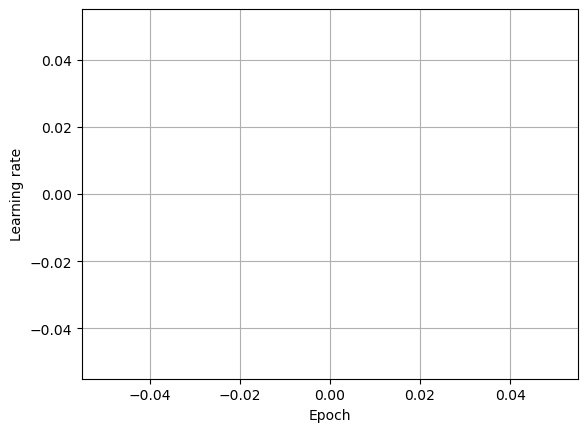

Training history for the following config - 
model                        PtychoNNPhaseOnlyModel
batch_size_per_process                           64
learning_rate_per_process                    0.0001
min_val_loss_total                         0.194759
min_val_loss_mag                                0.0
min_val_loss_phase                         0.194759
epoch_min_val_loss                             59.0
Name: 1, dtype: object
inf
Unable to plot: loss array is empty.


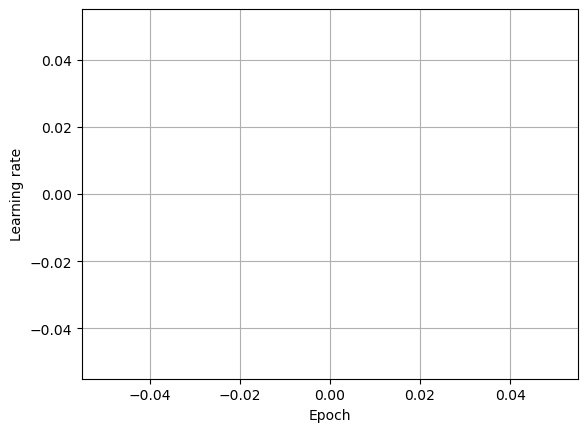

Training history for the following config - 
model                        PtychoNNPhaseOnlyModel
batch_size_per_process                           32
learning_rate_per_process                     0.001
min_val_loss_total                         0.158422
min_val_loss_mag                                0.0
min_val_loss_phase                         0.158422
epoch_min_val_loss                             35.0
Name: 2, dtype: object
inf
Unable to plot: loss array is empty.


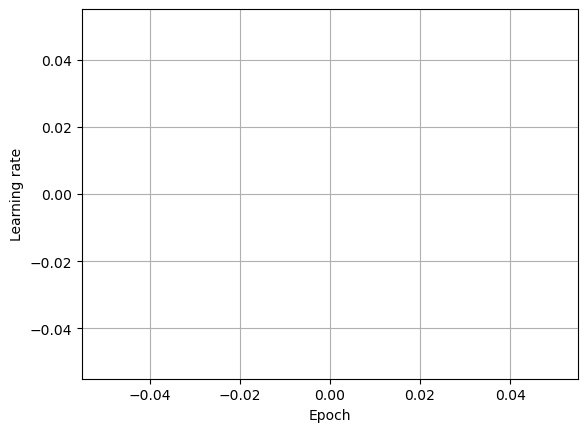

Training history for the following config - 
model                        PtychoNNPhaseOnlyModel
batch_size_per_process                           32
learning_rate_per_process                    0.0001
min_val_loss_total                         0.183676
min_val_loss_mag                                0.0
min_val_loss_phase                         0.183676
epoch_min_val_loss                             58.0
Name: 3, dtype: object
inf
Unable to plot: loss array is empty.


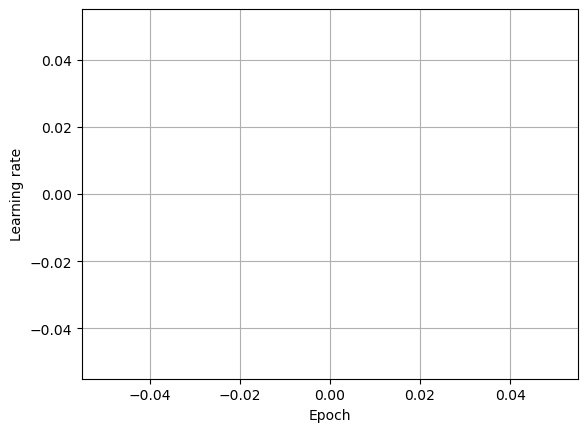

Training history for the following config - 
model                        PtychoNNModel_nLevels_3
batch_size_per_process                            64
learning_rate_per_process                      0.001
min_val_loss_total                          0.357435
min_val_loss_mag                             0.07597
min_val_loss_phase                          0.281466
epoch_min_val_loss                              35.0
Name: 4, dtype: object
inf
Unable to plot: loss array is empty.


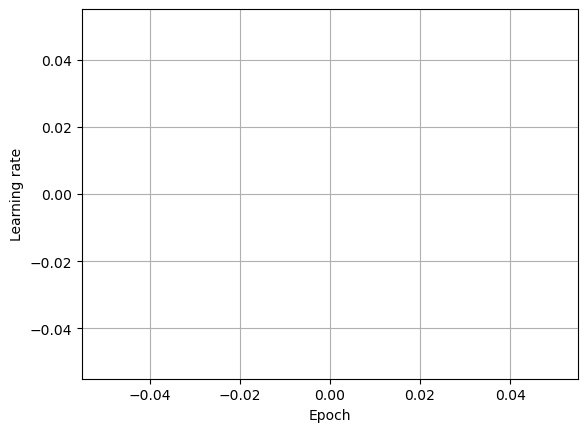

Training history for the following config - 
model                        PtychoNNModel_nLevels_3
batch_size_per_process                            64
learning_rate_per_process                     0.0001
min_val_loss_total                          0.339784
min_val_loss_mag                             0.01883
min_val_loss_phase                          0.320954
epoch_min_val_loss                              59.0
Name: 5, dtype: object
inf
Unable to plot: loss array is empty.


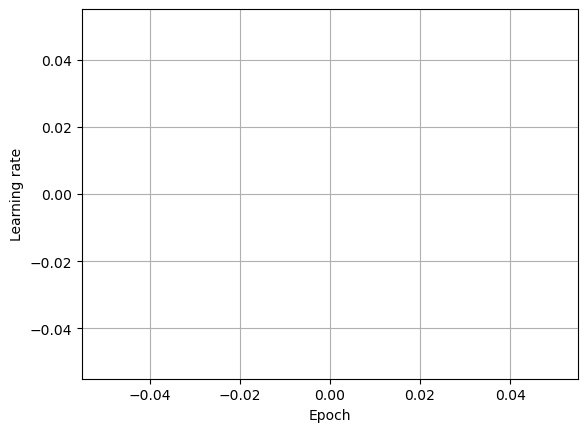

Training history for the following config - 
model                        PtychoNNModel_nLevels_3
batch_size_per_process                            32
learning_rate_per_process                      0.001
min_val_loss_total                          0.276301
min_val_loss_mag                            0.013648
min_val_loss_phase                          0.262652
epoch_min_val_loss                              55.0
Name: 6, dtype: object
inf
Unable to plot: loss array is empty.


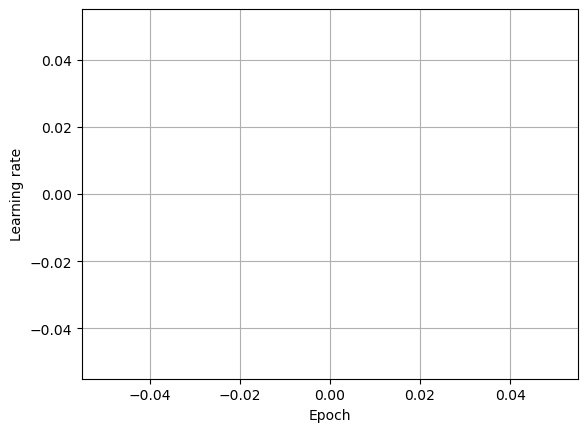

Training history for the following config - 
model                        PtychoNNModel_nLevels_3
batch_size_per_process                            32
learning_rate_per_process                     0.0001
min_val_loss_total                          0.323612
min_val_loss_mag                            0.016022
min_val_loss_phase                          0.307589
epoch_min_val_loss                              59.0
Name: 7, dtype: object
inf
Unable to plot: loss array is empty.


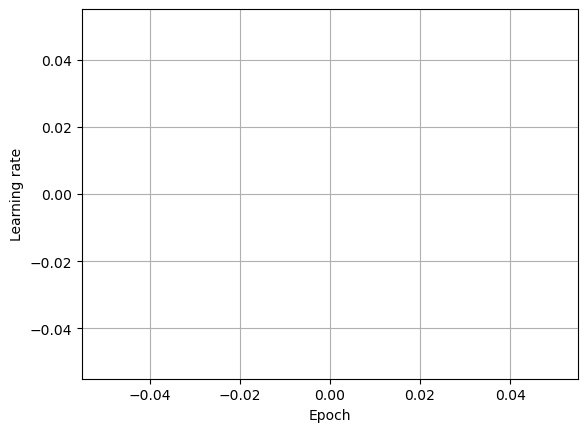

Training history for the following config - 
model                        PtychoNNModel_nLevels_4
batch_size_per_process                            64
learning_rate_per_process                      0.001
min_val_loss_total                          0.229261
min_val_loss_mag                            0.077284
min_val_loss_phase                          0.151978
epoch_min_val_loss                              23.0
Name: 8, dtype: object
inf
Unable to plot: loss array is empty.


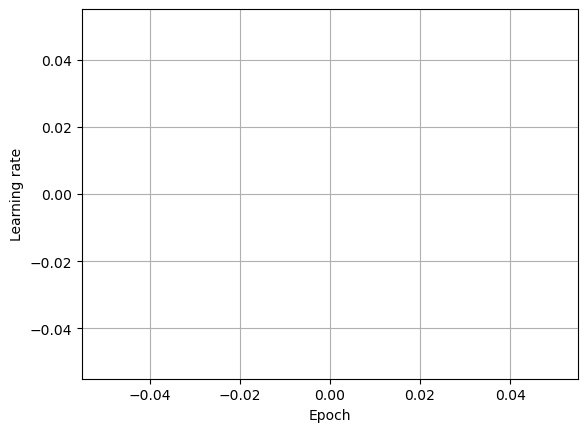

Training history for the following config - 
model                        PtychoNNModel_nLevels_4
batch_size_per_process                            64
learning_rate_per_process                     0.0001
min_val_loss_total                          0.180859
min_val_loss_mag                            0.014984
min_val_loss_phase                          0.165875
epoch_min_val_loss                              57.0
Name: 9, dtype: object
inf
Unable to plot: loss array is empty.


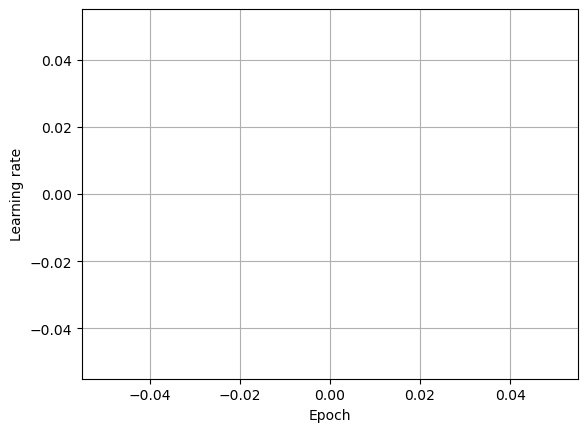

Training history for the following config - 
model                        PtychoNNModel_nLevels_4
batch_size_per_process                            32
learning_rate_per_process                      0.001
min_val_loss_total                           0.21899
min_val_loss_mag                            0.075453
min_val_loss_phase                          0.143537
epoch_min_val_loss                              23.0
Name: 10, dtype: object
inf
Unable to plot: loss array is empty.


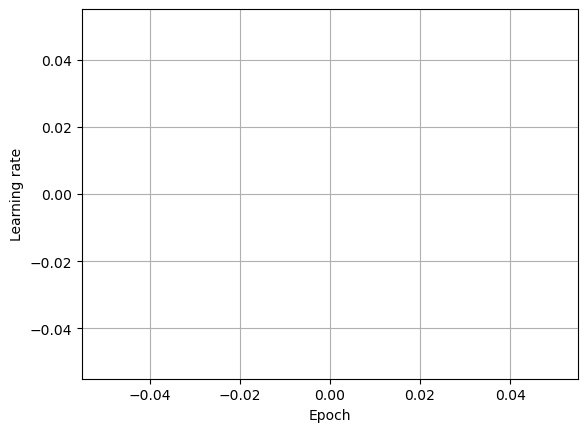

Training history for the following config - 
model                        PtychoNNModel_nLevels_4
batch_size_per_process                            32
learning_rate_per_process                     0.0001
min_val_loss_total                          0.179693
min_val_loss_mag                            0.017024
min_val_loss_phase                          0.162669
epoch_min_val_loss                              35.0
Name: 11, dtype: object
inf
Unable to plot: loss array is empty.


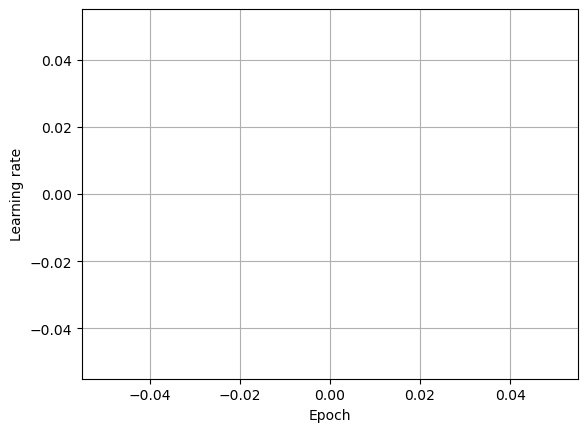

In [14]:
scanner.plot_all_training_history()

[2023-11-24 22:49:27,047] Using DataParallel with 2 devices.


Testing results for the following config - 
model                        PtychoNNPhaseOnlyModel
batch_size_per_process                           64
learning_rate_per_process                     0.001
min_val_loss_total                         0.520122
min_val_loss_mag                                0.0
min_val_loss_phase                         0.520122
epoch_min_val_loss                              1.0
Name: 0, dtype: object


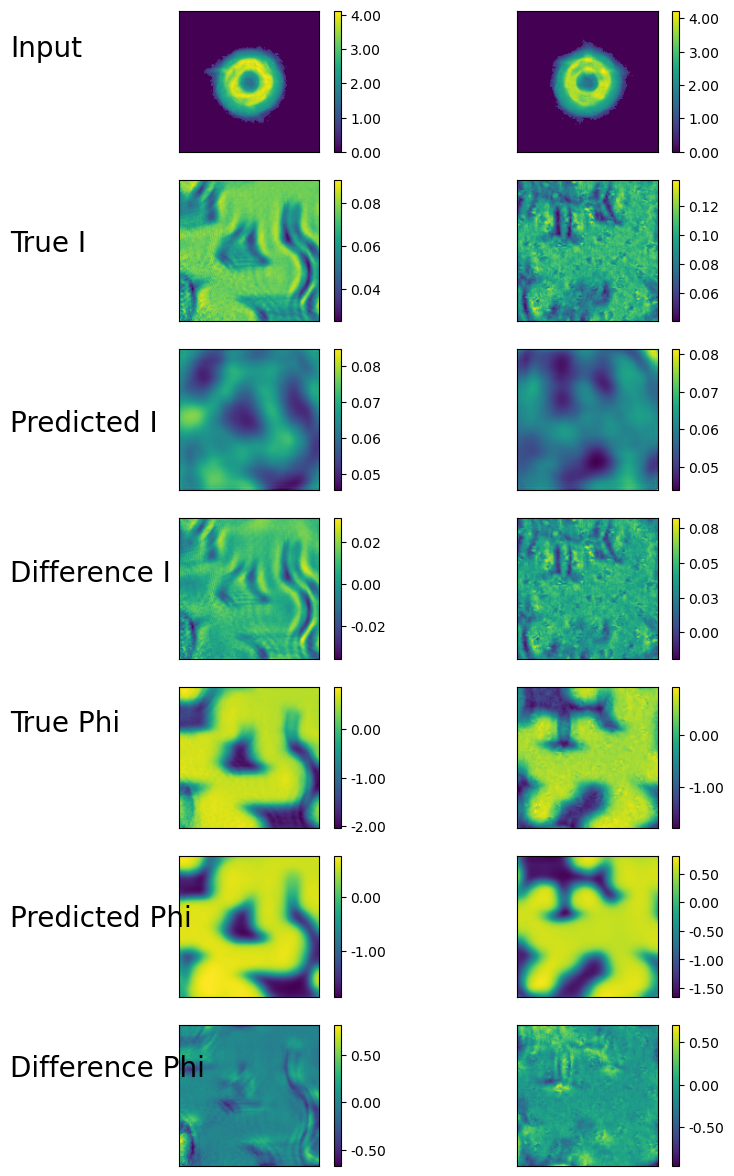

[2023-11-24 22:49:28,437] Using DataParallel with 2 devices.


Testing results for the following config - 
model                        PtychoNNPhaseOnlyModel
batch_size_per_process                           64
learning_rate_per_process                    0.0001
min_val_loss_total                         0.194759
min_val_loss_mag                                0.0
min_val_loss_phase                         0.194759
epoch_min_val_loss                             59.0
Name: 1, dtype: object


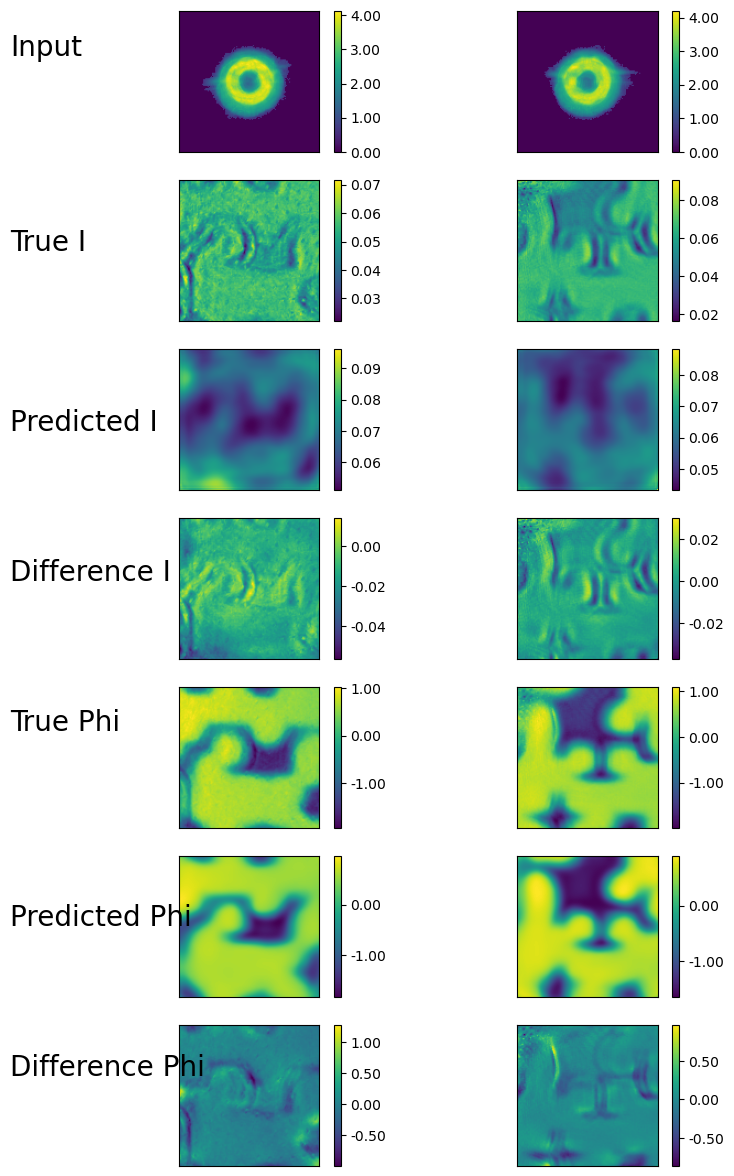

[2023-11-24 22:49:29,778] Using DataParallel with 2 devices.


Testing results for the following config - 
model                        PtychoNNPhaseOnlyModel
batch_size_per_process                           32
learning_rate_per_process                     0.001
min_val_loss_total                         0.158422
min_val_loss_mag                                0.0
min_val_loss_phase                         0.158422
epoch_min_val_loss                             35.0
Name: 2, dtype: object


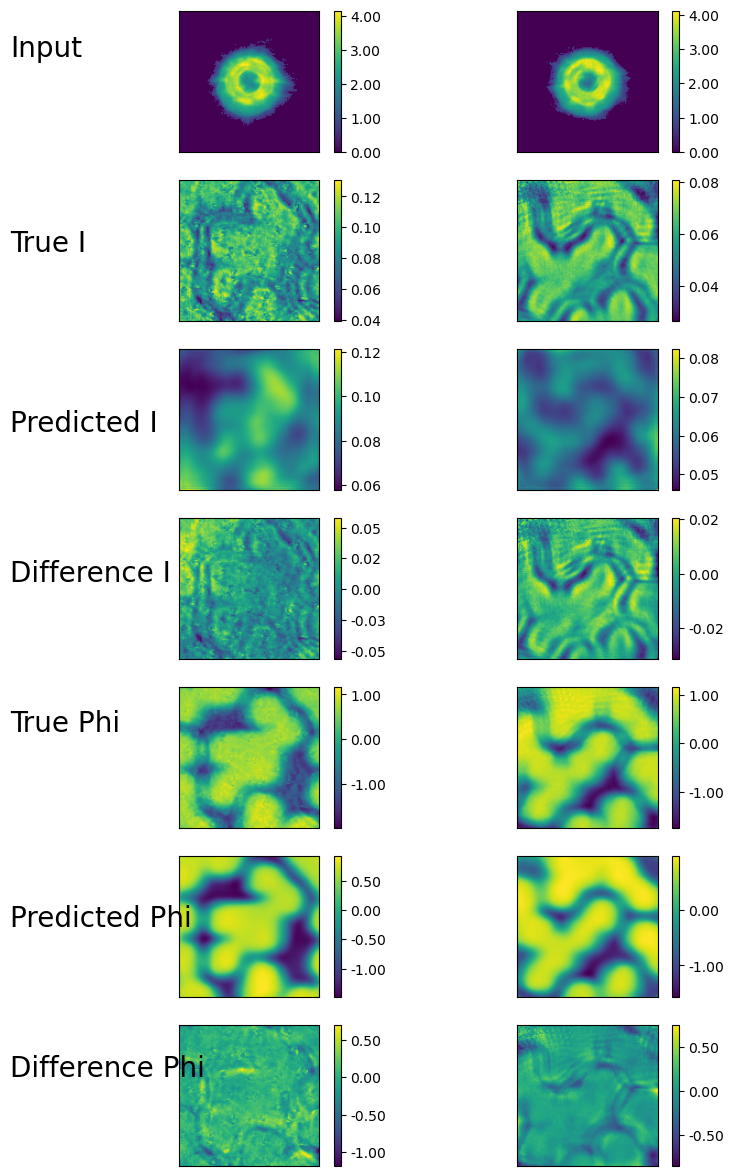

[2023-11-24 22:49:31,521] Using DataParallel with 2 devices.


Testing results for the following config - 
model                        PtychoNNPhaseOnlyModel
batch_size_per_process                           32
learning_rate_per_process                    0.0001
min_val_loss_total                         0.183676
min_val_loss_mag                                0.0
min_val_loss_phase                         0.183676
epoch_min_val_loss                             58.0
Name: 3, dtype: object


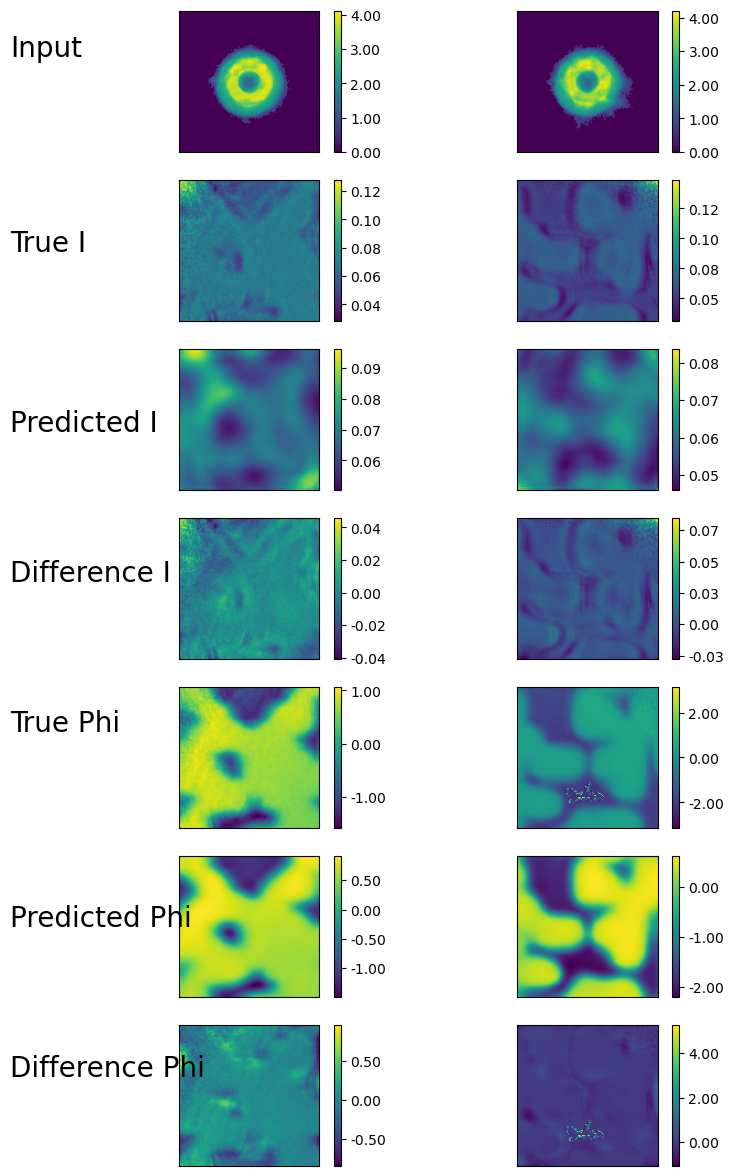

[2023-11-24 22:49:32,874] Using DataParallel with 2 devices.


Testing results for the following config - 
model                        PtychoNNModel_nLevels_3
batch_size_per_process                            64
learning_rate_per_process                      0.001
min_val_loss_total                          0.357435
min_val_loss_mag                             0.07597
min_val_loss_phase                          0.281466
epoch_min_val_loss                              35.0
Name: 4, dtype: object


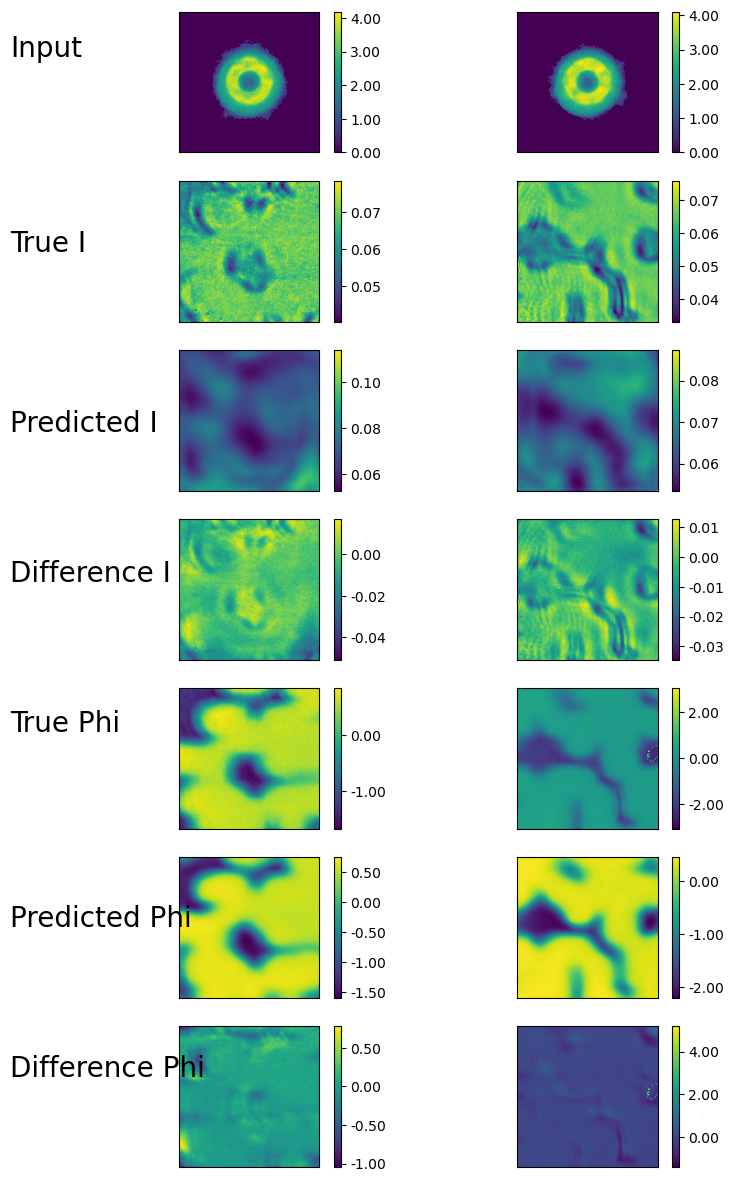

[2023-11-24 22:49:34,526] Using DataParallel with 2 devices.


Testing results for the following config - 
model                        PtychoNNModel_nLevels_3
batch_size_per_process                            64
learning_rate_per_process                     0.0001
min_val_loss_total                          0.339784
min_val_loss_mag                             0.01883
min_val_loss_phase                          0.320954
epoch_min_val_loss                              59.0
Name: 5, dtype: object


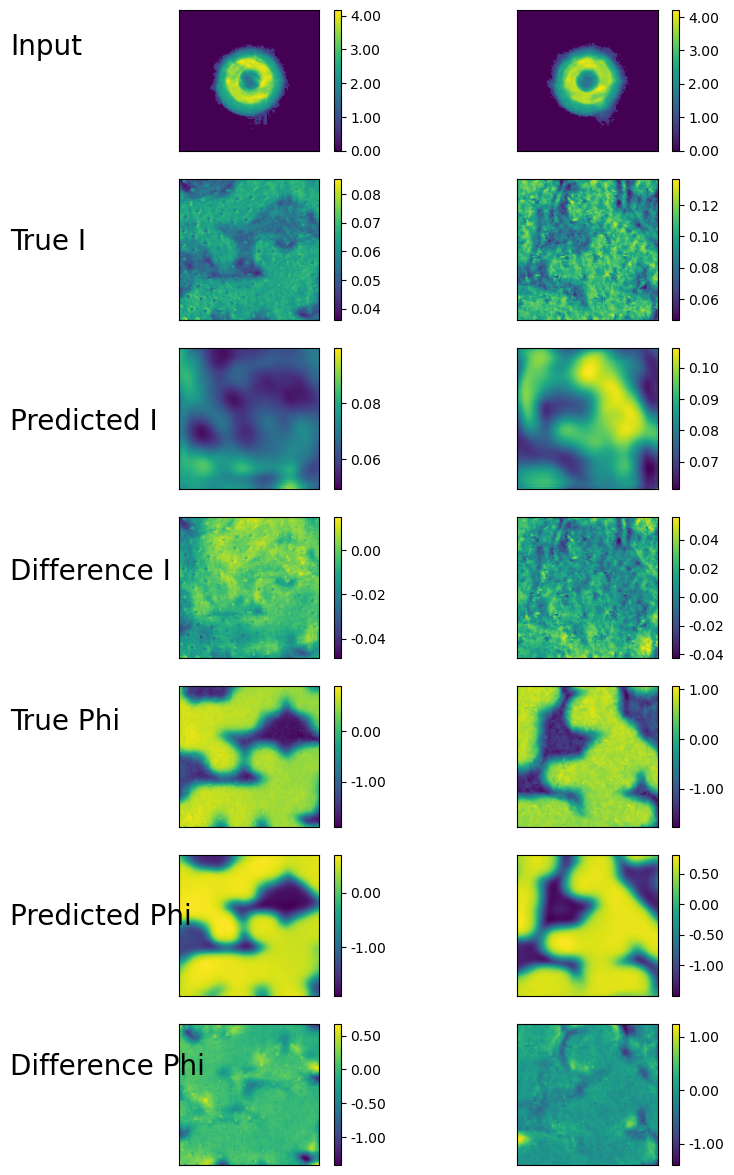

[2023-11-24 22:49:35,862] Using DataParallel with 2 devices.


Testing results for the following config - 
model                        PtychoNNModel_nLevels_3
batch_size_per_process                            32
learning_rate_per_process                      0.001
min_val_loss_total                          0.276301
min_val_loss_mag                            0.013648
min_val_loss_phase                          0.262652
epoch_min_val_loss                              55.0
Name: 6, dtype: object


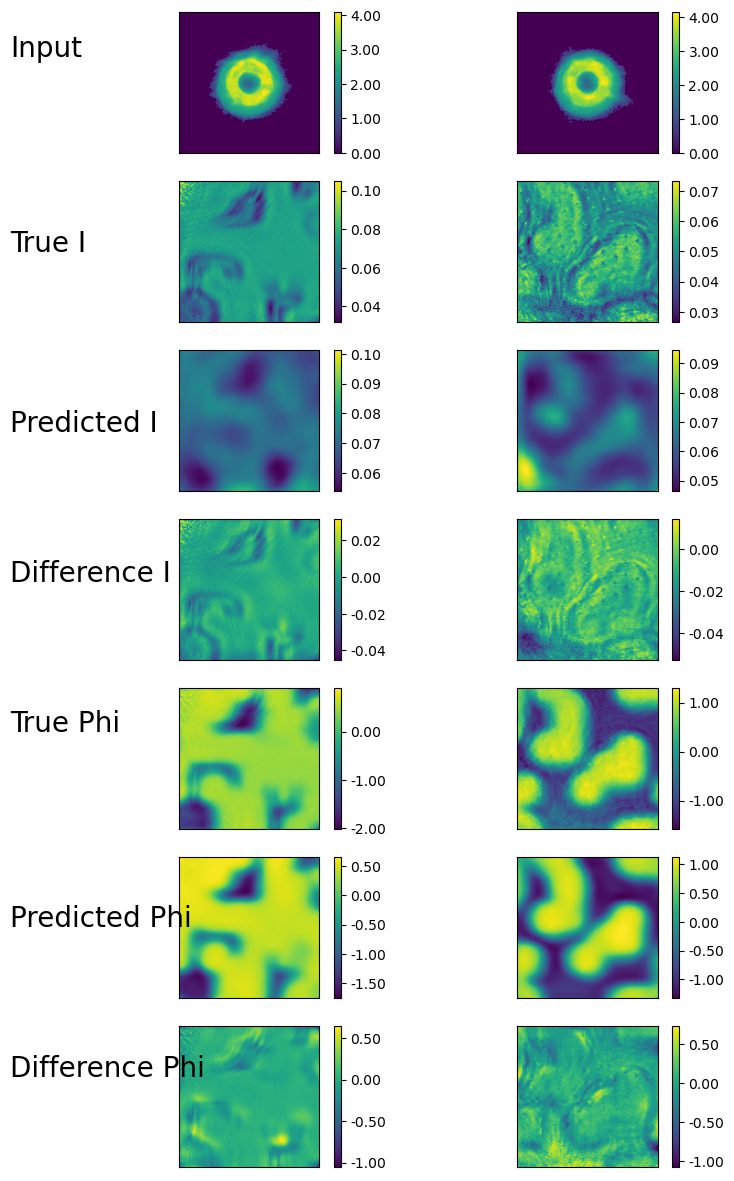

[2023-11-24 22:49:37,286] Using DataParallel with 2 devices.


Testing results for the following config - 
model                        PtychoNNModel_nLevels_3
batch_size_per_process                            32
learning_rate_per_process                     0.0001
min_val_loss_total                          0.323612
min_val_loss_mag                            0.016022
min_val_loss_phase                          0.307589
epoch_min_val_loss                              59.0
Name: 7, dtype: object


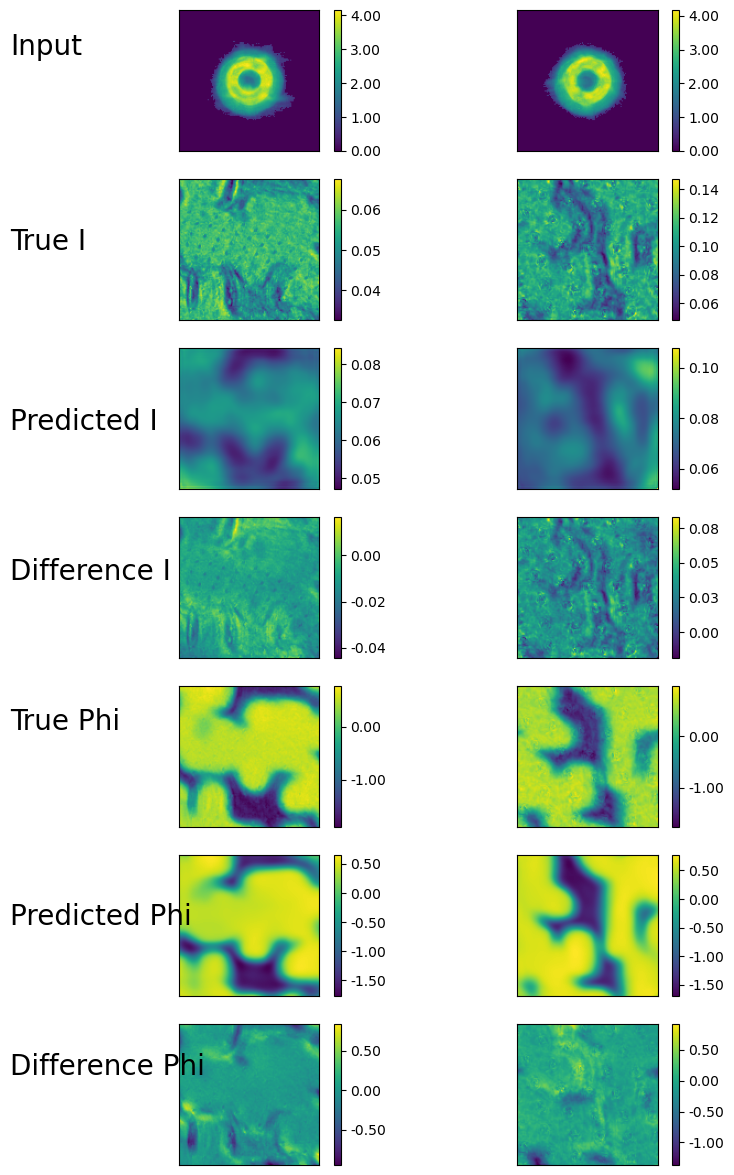

[2023-11-24 22:49:38,971] Using DataParallel with 2 devices.


Testing results for the following config - 
model                        PtychoNNModel_nLevels_4
batch_size_per_process                            64
learning_rate_per_process                      0.001
min_val_loss_total                          0.229261
min_val_loss_mag                            0.077284
min_val_loss_phase                          0.151978
epoch_min_val_loss                              23.0
Name: 8, dtype: object


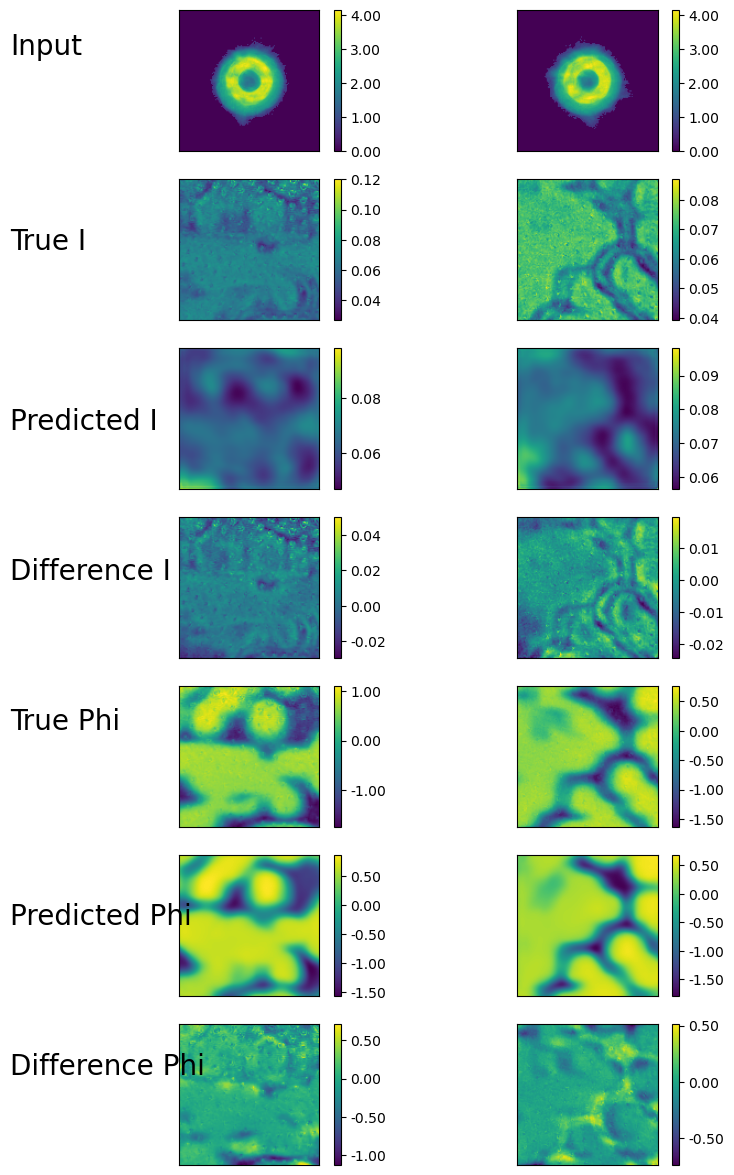

[2023-11-24 22:49:40,312] Using DataParallel with 2 devices.


Testing results for the following config - 
model                        PtychoNNModel_nLevels_4
batch_size_per_process                            64
learning_rate_per_process                     0.0001
min_val_loss_total                          0.180859
min_val_loss_mag                            0.014984
min_val_loss_phase                          0.165875
epoch_min_val_loss                              57.0
Name: 9, dtype: object


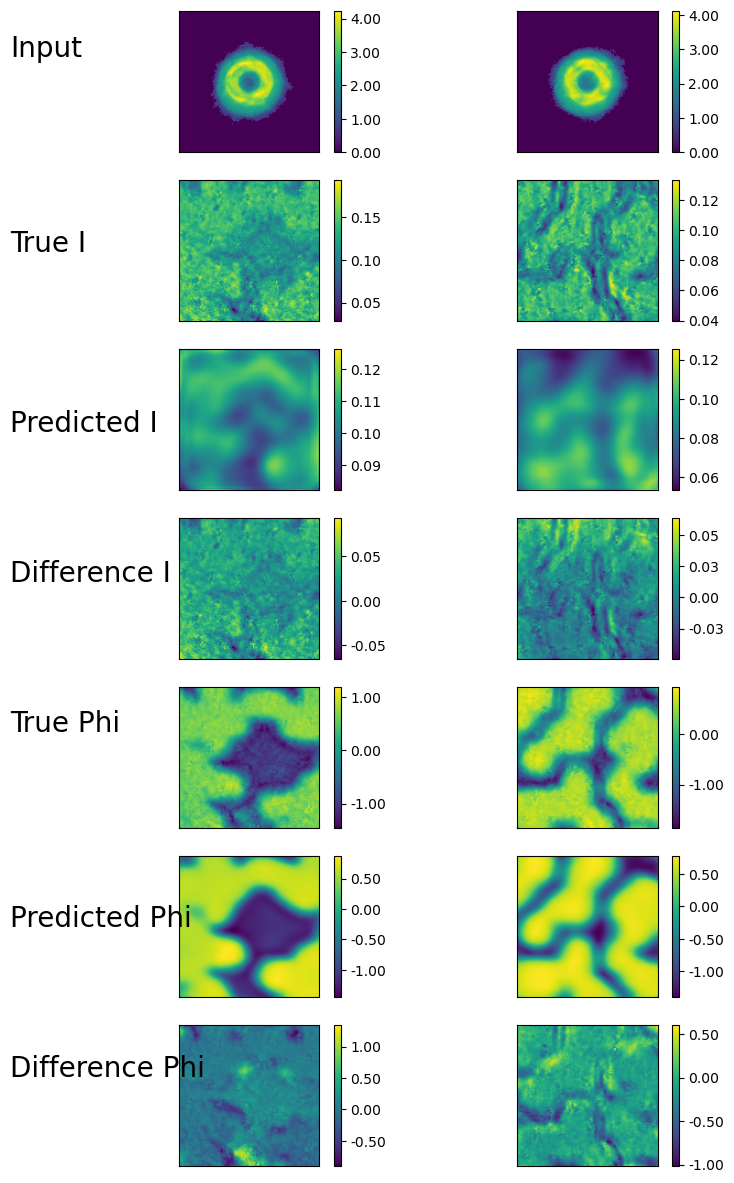

[2023-11-24 22:49:41,916] Using DataParallel with 2 devices.


Testing results for the following config - 
model                        PtychoNNModel_nLevels_4
batch_size_per_process                            32
learning_rate_per_process                      0.001
min_val_loss_total                           0.21899
min_val_loss_mag                            0.075453
min_val_loss_phase                          0.143537
epoch_min_val_loss                              23.0
Name: 10, dtype: object


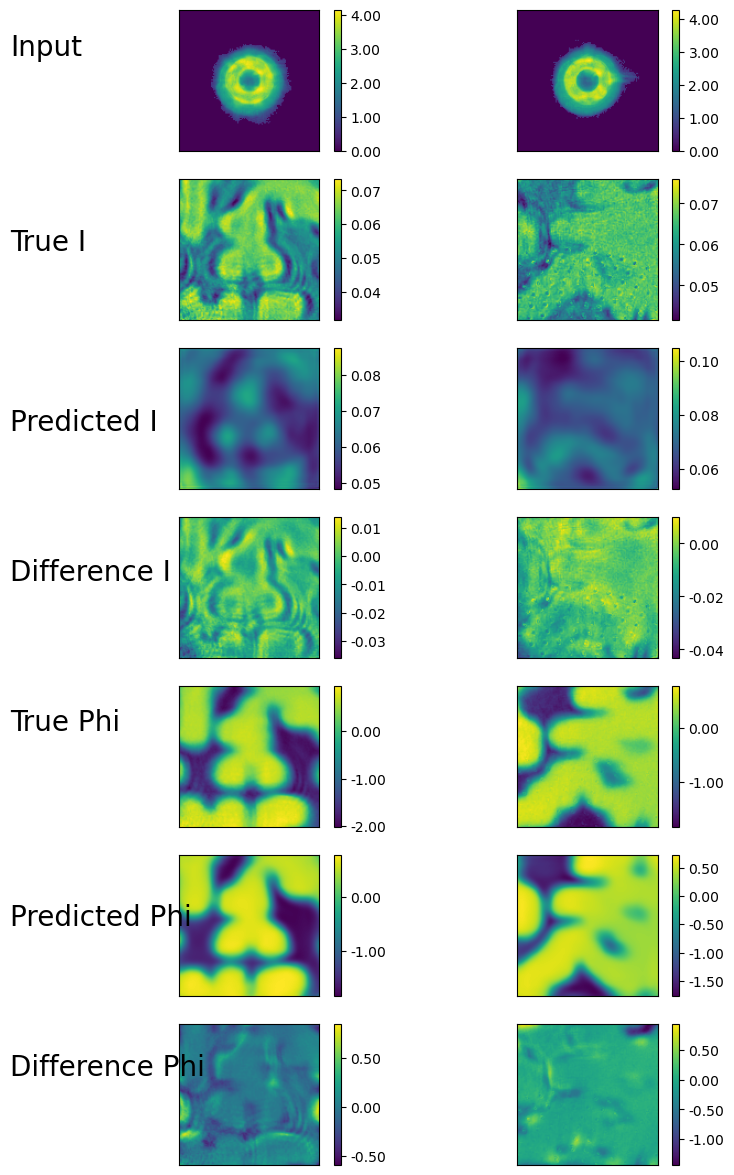

[2023-11-24 22:49:43,225] Using DataParallel with 2 devices.


Testing results for the following config - 
model                        PtychoNNModel_nLevels_4
batch_size_per_process                            32
learning_rate_per_process                     0.0001
min_val_loss_total                          0.179693
min_val_loss_mag                            0.017024
min_val_loss_phase                          0.162669
epoch_min_val_loss                              35.0
Name: 11, dtype: object


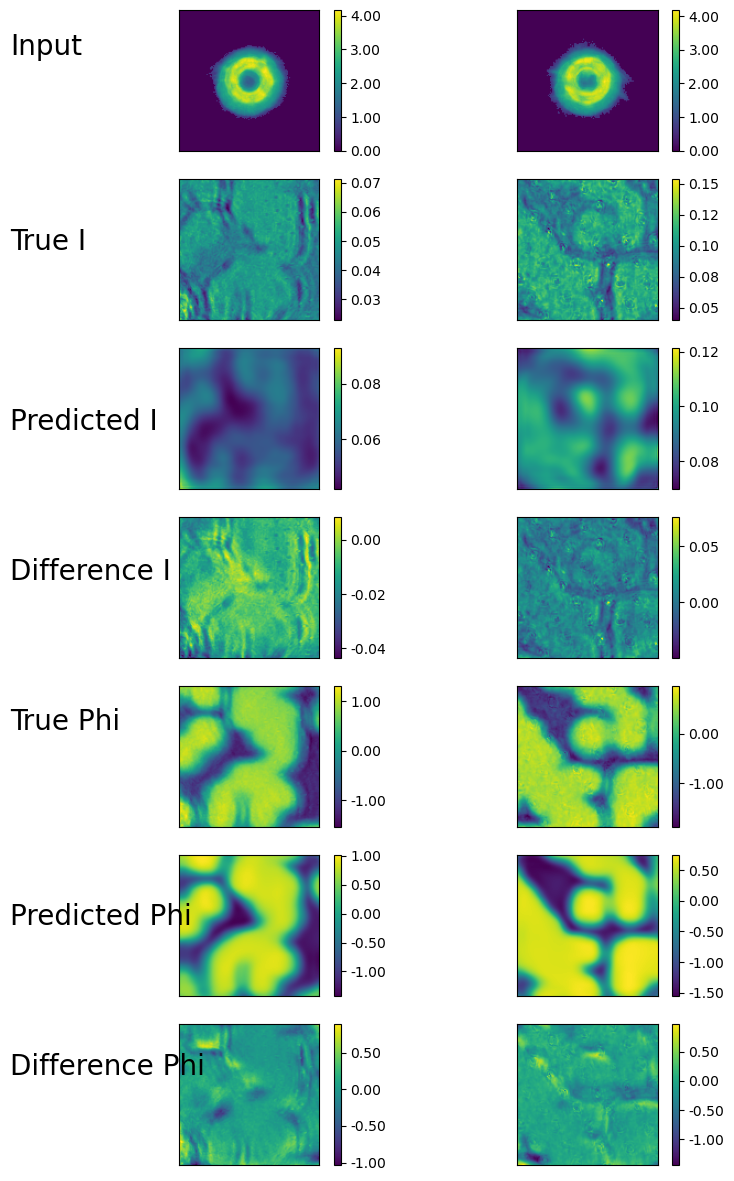

In [8]:
scanner.run_testing_for_all((0, 1))

AttributeError: Can't pickle local object 'TrainingConfigDict.__init__.<locals>.<lambda>'